# $$Data Science Assignment - Full Time$$
---
---

# Credit Risk Prediciton
**Life cycle of Machine learning Project**

* Understanding the Problem Statement
* Data Collection
* Data Cleaning
* Exploratory data analysis
* Data Pre-Processing
* Model Training 
* Choose best model

## 1) Problem statement.

- A person’s creditworthiness is often associated (conversely) with the likelihood they may default on loans. 

- In the proposed model, credit risk prediction is performed on the given dataset. The model predicts the chances an applicant to be considered at high risk.
 
  - 0 = Low credit risk i.e high chance of paying back the loan amount

  - 1 = High credit risk i.e low chance of paying back the loan amount

### Dataset

The dataset has two files:

1. `applicant.csv`: This file contains personal data about the (primary) applicant
 - Unique ID: `applicant_id` (string)
 - Other fields:
    - Primary_applicant_age_in_years (numeric)
    - Gender (string)
    - Marital_status (string)
    - Number_of_dependents (numeric)
    - Housing (string)
    - Years_at_current_residence (numeric)
    - Employment_status (string)
    - Has_been_employed_for_at_least (string)
    - Has_been_employed_for_at_most (string)
    - Telephone (string)
    - Foreign_worker (numeric)
    - Savings_account_balance (string)
    - Balance_in_existing_bank_account_(lower_limit_of_bucket) (string)
    - Balance_in_existing_bank_account_(upper_limit_of_bucket) (string)


2. `loan.csv`: This file contains data more specific to the loan application
 - Target: `high_risk_application` (numeric)
 - Other fields:
    - applicant_id (string)
    - Months_loan_taken_for (numeric)
    - Purpose (string)
    - Principal_loan_amount (numeric)
    - EMI_rate_in_percentage_of_disposable_income (numeric)
    - Property (string)
    - Has_coapplicant (numeric)
    - Has_guarantor (numeric)
    - Other_EMI_plans (string)
    - Number_of_existing_loans_at_this_bank (numeric)
    - Loan_history (string)


### 2)  Import Data 

**Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import plotly.express as px

import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import chi2_contingency

import warnings
warnings.filterwarnings("ignore")

**Import the CSV Data as Pandas DataFrame**

In [2]:
data_1 = pd.read_csv('data/applicant.csv')
data_1.head()    # Show Top 5 Records

,applicant_id,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Telephone,Foreign_worker,Savings_account_balance,Balance_in_existing_bank_account_(lower_limit_of_bucket),Balance_in_existing_bank_account_(upper_limit_of_bucket)
0,1469590,67,male,single,1,own,4,skilled employee / official,7 years,NaN,Registered under the applicant's name,1,NaN,NaN,0
1,1203873,22,female,divorced/separated/married,1,own,2,skilled employee / official,1 year,4 years,NaN,1,Low,0,2 lac
2,1432761,49,male,single,2,own,3,unskilled - resident,4 years,7 years,NaN,1,Low,NaN,NaN
3,1207582,45,male,single,2,for free,4,skilled employee / official,4 years,7 years,NaN,1,Low,NaN,0
4,1674436,53,male,single,2,for free,4,skilled employee / official,1 year,4 years,NaN,1,Low,NaN,0


In [3]:
data_2 = pd.read_csv('data/loan.csv')
data_2.head()

,loan_application_id,applicant_id,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Other_EMI_plans,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,d68d975e-edad-11ea-8761-1d6f9c1ff461,1469590,6,electronic equipment,1169000,4,real estate,0,0,NaN,2,critical/pending loans at other banks,0
1,d68d989e-edad-11ea-b1d5-2bcf65006448,1203873,48,electronic equipment,5951000,2,real estate,0,0,NaN,1,existing loans paid back duly till now,1
2,d68d995c-edad-11ea-814a-1b6716782575,1432761,12,education,2096000,2,real estate,0,0,NaN,1,critical/pending loans at other banks,0
3,d68d99fc-edad-11ea-8841-17e8848060ae,1207582,42,FF&E,7882000,2,building society savings agreement/life insurance,0,1,NaN,1,existing loans paid back duly till now,0
4,d68d9a92-edad-11ea-9f3d-1f8682db006a,1674436,24,new vehicle,4870000,3,NaN,0,0,NaN,2,delay in paying off loans in the past,1


**Shape of the dataset**

In [4]:
print('data_1 shape: {} \ndata_2 shape: {}'.format(data_1.shape, data_2.shape))

data_1 shape: (1000, 15) 
data_2 shape: (1000, 13)


**Merge dataset with common feature - applicant_id**

In [5]:
df = pd.merge(data_1, data_2, on='applicant_id', how='outer')
pd.set_option('display.max_columns', None) # to display all columns
df.head()

,applicant_id,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Telephone,Foreign_worker,Savings_account_balance,Balance_in_existing_bank_account_(lower_limit_of_bucket),Balance_in_existing_bank_account_(upper_limit_of_bucket),loan_application_id,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Other_EMI_plans,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,1469590,67,male,single,1,own,4,skilled employee / official,7 years,NaN,Registered under the applicant's name,1,NaN,NaN,0,d68d975e-edad-11ea-8761-1d6f9c1ff461,6,electronic equipment,1169000,4,real estate,0,0,NaN,2,critical/pending loans at other banks,0
1,1203873,22,female,divorced/separated/married,1,own,2,skilled employee / official,1 year,4 years,NaN,1,Low,0,2 lac,d68d989e-edad-11ea-b1d5-2bcf65006448,48,electronic equipment,5951000,2,real estate,0,0,NaN,1,existing loans paid back duly till now,1
2,1432761,49,male,single,2,own,3,unskilled - resident,4 years,7 years,NaN,1,Low,NaN,NaN,d68d995c-edad-11ea-814a-1b6716782575,12,education,2096000,2,real estate,0,0,NaN,1,critical/pending loans at other banks,0
3,1207582,45,male,single,2,for free,4,skilled employee / official,4 years,7 years,NaN,1,Low,NaN,0,d68d99fc-edad-11ea-8841-17e8848060ae,42,FF&E,7882000,2,building society savings agreement/life insurance,0,1,NaN,1,existing loans paid back duly till now,0
4,1674436,53,male,single,2,for free,4,skilled employee / official,1 year,4 years,NaN,1,Low,NaN,0,d68d9a92-edad-11ea-9f3d-1f8682db006a,24,new vehicle,4870000,3,NaN,0,0,NaN,2,delay in paying off loans in the past,1


In [6]:
print('df shape: {}'.format(df.shape))

df shape: (1000, 27)


**Save merged dataset to csv file.**

In [7]:
df.to_csv('data/merged_data.csv')

In [8]:
df.high_risk_applicant.value_counts()

0    700
1    300
Name: high_risk_applicant, dtype: int64

- More number of applicants, have low credit risk.

**Summary of the dataset**

In [9]:
# Display summary statistics for a dataframe
df.describe()

,applicant_id,Primary_applicant_age_in_years,Number_of_dependents,Years_at_current_residence,Foreign_worker,Months_loan_taken_for,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,high_risk_applicant
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.514763e+06,35.546000,1.155000,2.845000,0.963000,20.903000,3.271258e+06,2.973000,0.041000,0.052000,1.407000,0.300000
std,2.286764e+05,11.375469,0.362086,1.103718,0.188856,12.058814,2.822737e+06,1.118715,0.198389,0.222138,0.577654,0.458487
min,1.105364e+06,19.000000,1.000000,1.000000,0.000000,4.000000,2.500000e+05,1.000000,0.000000,0.000000,1.000000,0.000000
25%,1.321398e+06,27.000000,1.000000,2.000000,1.000000,12.000000,1.365500e+06,2.000000,0.000000,0.000000,1.000000,0.000000
50%,1.529114e+06,33.000000,1.000000,3.000000,1.000000,18.000000,2.319500e+06,3.000000,0.000000,0.000000,1.000000,0.000000
75%,1.707752e+06,42.000000,1.000000,4.000000,1.000000,24.000000,3.972250e+06,4.000000,0.000000,0.000000,2.000000,1.000000
max,1.903505e+06,75.000000,2.000000,4.000000,1.000000,72.000000,1.842400e+07,4.000000,1.000000,1.000000,4.000000,1.000000


### Statistical Inferences
- Min `age` is 19 & Max is 75.
- Median `age` of applicant is 35 years and median `Months_loan_taken_for` is 20.
- 25% of the applicant is aged below 27.
- Another 25% is aged above 42 and remaining in between these ages.
- Max of `Number_of_dependents`is 2.
- Max `Principal_loan_amount` is 1.842400e+07 (1.84 Cr.) & Min is 2.500000e+05 (2.5 Lakh).
- Mean/Average `Principal_loan_amount` is 3.271258e+06 (32.7 Lakh).

**Check Datatypes in the dataset**

In [10]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   applicant_id                                              1000 non-null   int64 
 1   Primary_applicant_age_in_years                            1000 non-null   int64 
 2   Gender                                                    1000 non-null   object
 3   Marital_status                                            1000 non-null   object
 4   Number_of_dependents                                      1000 non-null   int64 
 5   Housing                                                   1000 non-null   object
 6   Years_at_current_residence                                1000 non-null   int64 
 7   Employment_status                                         1000 non-null   object
 8   Has_been_employed_for_at_leas

## 3. EXPLORING DATA

In [11]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : \n{}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : \n{}'.format(len(categorical_features), categorical_features))

We have 12 numerical features : 
['applicant_id', 'Primary_applicant_age_in_years', 'Number_of_dependents', 'Years_at_current_residence', 'Foreign_worker', 'Months_loan_taken_for', 'Principal_loan_amount', 'EMI_rate_in_percentage_of_disposable_income', 'Has_coapplicant', 'Has_guarantor', 'Number_of_existing_loans_at_this_bank', 'high_risk_applicant']

We have 15 categorical features : 
['Gender', 'Marital_status', 'Housing', 'Employment_status', 'Has_been_employed_for_at_least', 'Has_been_employed_for_at_most', 'Telephone', 'Savings_account_balance', 'Balance_in_existing_bank_account_(lower_limit_of_bucket)', 'Balance_in_existing_bank_account_(upper_limit_of_bucket)', 'loan_application_id', 'Purpose', 'Property', 'Other_EMI_plans', 'Loan_history']


**Proportion of count data on categorical columns**

In [12]:
for col in categorical_features:
    print(df[col].value_counts(normalize=True) * 100)
    print('--'*50)

male      69.0
female    31.0
Name: Gender, dtype: float64
----------------------------------------------------------------------------------------------------
single                        54.8
divorced/separated/married    31.0
married/widowed                9.2
divorced/separated             5.0
Name: Marital_status, dtype: float64
----------------------------------------------------------------------------------------------------
own         71.3
rent        17.9
for free    10.8
Name: Housing, dtype: float64
----------------------------------------------------------------------------------------------------
skilled employee / official                                         63.0
unskilled - resident                                                20.0
management / self-employed / highly qualified employee / officer    14.8
unemployed / unskilled - non-resident                                2.2
Name: Employment_status, dtype: float64
------------------------------------------------

## Univariate Analysis

* The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.

### Numerical Features

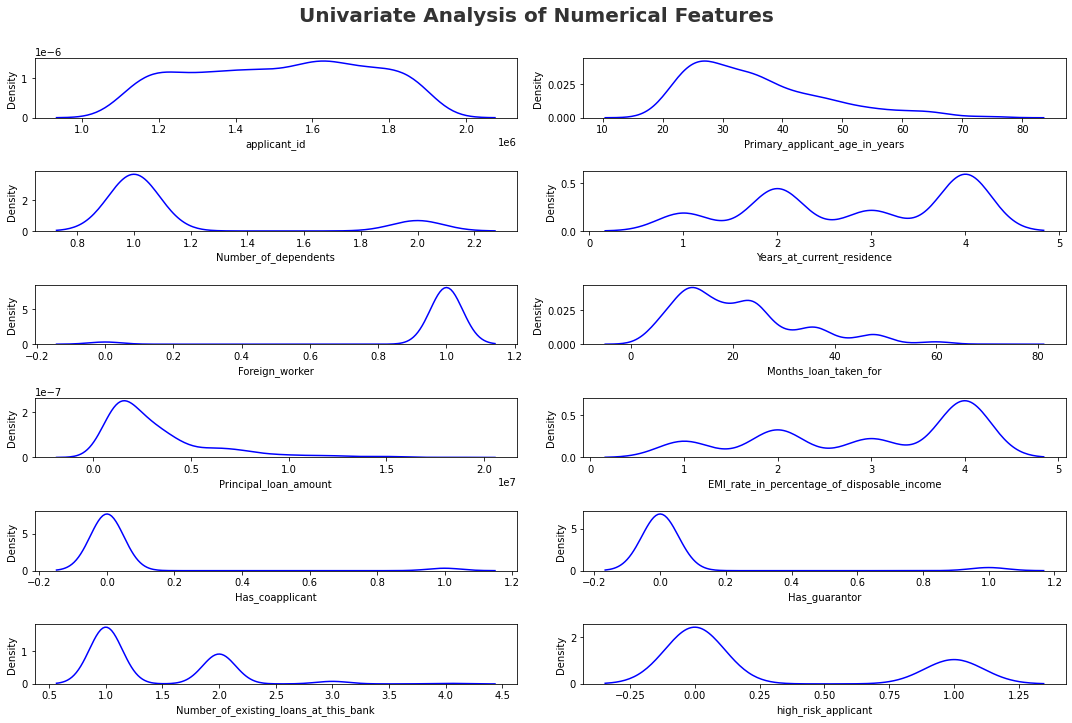

In [13]:
plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(6, 2, i+1)
    sb.kdeplot(x=df[numeric_features[i]], color='blue')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()
    
# save plot
# plt.savefig('./images/Univariate_Num.png')

**Report**
1. `applicant_id` is a primary key which have no importance.


2. Below are the only continuous features -
  - `Primary_applicant_age_in_years` 
  - `Months_loan_taken_for` 
  - `Principal_loan_amount` 


3. Below are the categorical features but they are encoded -
  - `Number_of_dependents` 
  - `Years_at_current_residence`
  - `Foreign_worker` 
  - `EMI_rate_in_percentage_of_disposable_income`
  - `Has_coapplicant` 
  - `Has_guarantor` 
  - `Number_of_existing_loans_at_this_bank`
  - `high_risk_applicant`

### Categorical Features

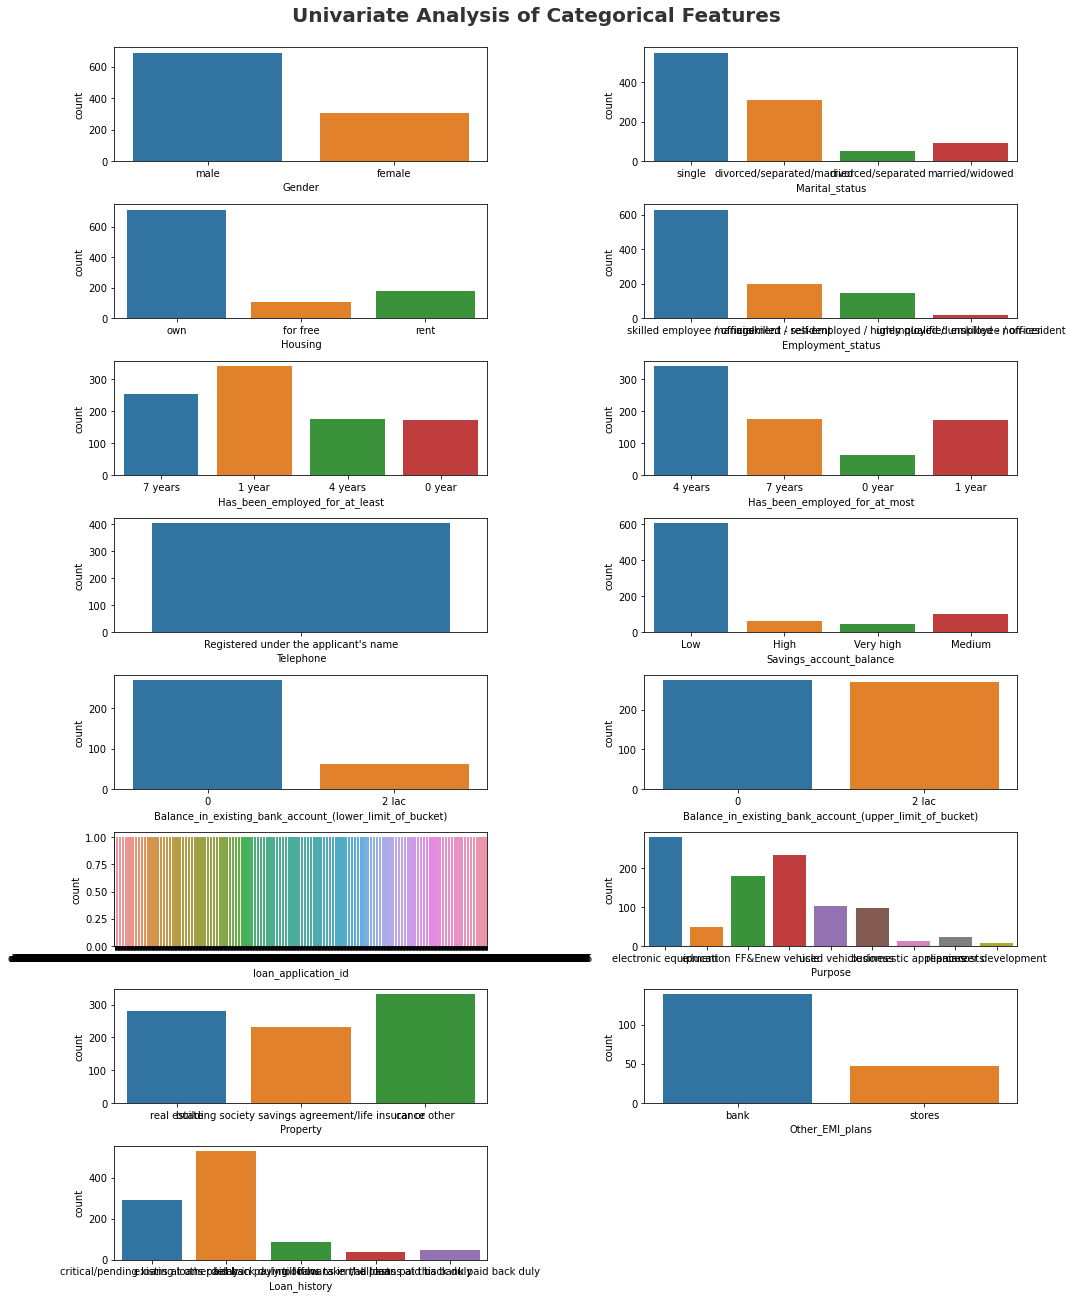

In [14]:
# categorical columns
plt.figure(figsize=(15, 18))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

# Adjusting space between/among subplots
plt.subplots_adjust(hspace=0.2)

for i in range(0, len(categorical_features)):
    plt.subplot(8, 2, i+1)
    sb.countplot(x=df[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    plt.tight_layout()
    
# save plot
# plt.savefig('./images/Univariate_Cat.png')

- `loan_application_id` have no importance.
- Most of the loan applicants are male (as per `Gender`) and single (as per the `Marital_status`), they own house (as per `Housing`). 
- Most of the loan applicants are skilled employee / official (as per `Employment_status`).
- Most of the loan applicants taking loan for purchasing electronic equipment & new vehicle (as per `Purpose`). 

## Multivariate Analysis
* Multivariate analysis is the analysis of more than one variable.

In [15]:
discrete_features = [feature for feature in numeric_features if (len(df[feature].unique())<=25 and len(df[feature].unique())>5)]

continuous_features = [feature for feature in numeric_features if len(df[feature].unique()) > 25]

encoded_categorical = [feature for feature in numeric_features if len(df[feature].unique()) <=5]

print('We have {} discrete features : {}'.format(len(discrete_features), discrete_features))
print('\nWe have {} continuous_features : {}'.format(len(continuous_features), continuous_features))
print('\nWe have {} encoded_categorical : {}'.format(len(encoded_categorical), encoded_categorical))

We have 0 discrete features : []

We have 4 continuous_features : ['applicant_id', 'Primary_applicant_age_in_years', 'Months_loan_taken_for', 'Principal_loan_amount']

We have 8 encoded_categorical : ['Number_of_dependents', 'Years_at_current_residence', 'Foreign_worker', 'EMI_rate_in_percentage_of_disposable_income', 'Has_coapplicant', 'Has_guarantor', 'Number_of_existing_loans_at_this_bank', 'high_risk_applicant']


- There are no discrete numerical features

In [16]:
categorical_features = categorical_features + encoded_categorical
print(categorical_features)

['Gender', 'Marital_status', 'Housing', 'Employment_status', 'Has_been_employed_for_at_least', 'Has_been_employed_for_at_most', 'Telephone', 'Savings_account_balance', 'Balance_in_existing_bank_account_(lower_limit_of_bucket)', 'Balance_in_existing_bank_account_(upper_limit_of_bucket)', 'loan_application_id', 'Purpose', 'Property', 'Other_EMI_plans', 'Loan_history', 'Number_of_dependents', 'Years_at_current_residence', 'Foreign_worker', 'EMI_rate_in_percentage_of_disposable_income', 'Has_coapplicant', 'Has_guarantor', 'Number_of_existing_loans_at_this_bank', 'high_risk_applicant']


### Check Multicollinearity in Numerical features

In [17]:
df[(list(df[continuous_features])[1:])].corr()

,Primary_applicant_age_in_years,Months_loan_taken_for,Principal_loan_amount
Primary_applicant_age_in_years,1.000000,-0.036136,0.032716
Months_loan_taken_for,-0.036136,1.000000,0.624984
Principal_loan_amount,0.032716,0.624984,1.000000


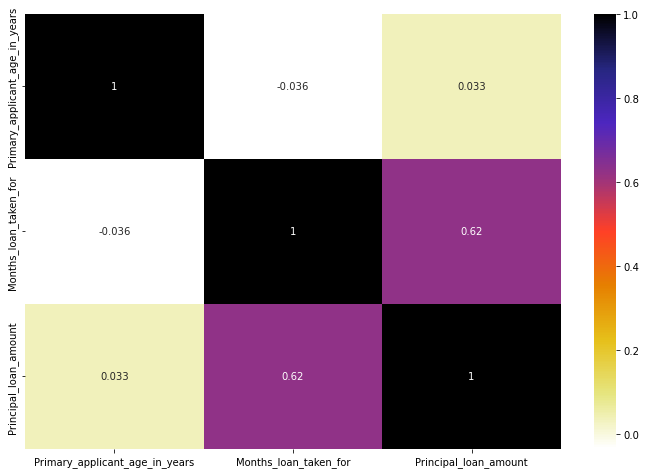

In [18]:
plt.figure(figsize = (12, 8))
cont_features = continuous_features.copy()
cont_features.remove('applicant_id')
sb.heatmap(df[cont_features].corr(), cmap="CMRmap_r", annot=True)
plt.show()

**Insight** 
* `Months_loan_taken_for` & `Principal_loan_amount` are slightly positively correlated, for the same the reason may be that highter the loan principle amount have higher loan tenure. We can not remove one of these feature as it may lead to loss vital imformation.
* For other features, there is no multicollinearity present in the dataset since their is no correlation between the features.

### Check Multicollinearity for Categorical features

* **A chi-squared test (also chi-square or χ2 test) is a statistical hypothesis test that is valid to perform when the test statistic is chi-squared distributed under the null hypothesis, specifically Pearson's chi-squared test**


* A chi-square statistic is one way to show a relationship between two categorical variables.

* Here we test correlation of Categorical columns with Target column i.e `high_risk_applicant`.

**Null Hypothesis ($ H_0 $)**: The Feature is independent of target column (No-Correlation)

**Alternative Hypothesis ($ H_1 $)**: The Feature and Target column are not independent (Correlated)

In [19]:
# from scipy.stats import chi2_contingency
chi2_test = []

try:
    for feature in categorical_features:
        if chi2_contingency(pd.crosstab(df['high_risk_applicant'], df[feature]))[1] < 0.05:
            chi2_test.append('Reject Null Hypothesis')
        else:
            chi2_test.append('Fail to Reject Null Hypothesis')
except Exception as e:
    print('Error: ', str(e))
    
result = pd.DataFrame(data=[categorical_features, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,Gender,Reject Null Hypothesis
1,Marital_status,Reject Null Hypothesis
2,Housing,Reject Null Hypothesis
3,Employment_status,Fail to Reject Null Hypothesis
4,Has_been_employed_for_at_least,Reject Null Hypothesis
5,Has_been_employed_for_at_most,Reject Null Hypothesis
6,Telephone,Fail to Reject Null Hypothesis
7,Savings_account_balance,Reject Null Hypothesis
8,Balance_in_existing_bank_account_(lower_limit_...,Reject Null Hypothesis
9,Balance_in_existing_bank_account_(upper_limit_...,Reject Null Hypothesis


**Report**
- From the above, we can observe that below feautes are independent to the target columnn (Not-Correlated with target).
 - Employment_status
 - Telephone
 - loan_application_id
 - Other_EMI_plans
 - Number_of_dependents
 - Years_at_current_residence
 - EMI_rate_in_percentage_of_disposable_income
 - Has_coapplicant
 - Has_guarantor
 - Number_of_existing_loans_at_this_bank

### Checking Null Values

In [20]:
df.isnull().sum().sort_values(ascending=True)

applicant_id                                                  0
Number_of_existing_loans_at_this_bank                         0
Has_guarantor                                                 0
Has_coapplicant                                               0
EMI_rate_in_percentage_of_disposable_income                   0
Principal_loan_amount                                         0
Months_loan_taken_for                                         0
loan_application_id                                           0
Loan_history                                                  0
Foreign_worker                                                0
high_risk_applicant                                           0
Employment_status                                             0
Years_at_current_residence                                    0
Housing                                                       0
Number_of_dependents                                          0
Marital_status                          

In [21]:
# df.isnull().mean().sort_values(ascending=True)

**We have missing values in which we have to deal with**

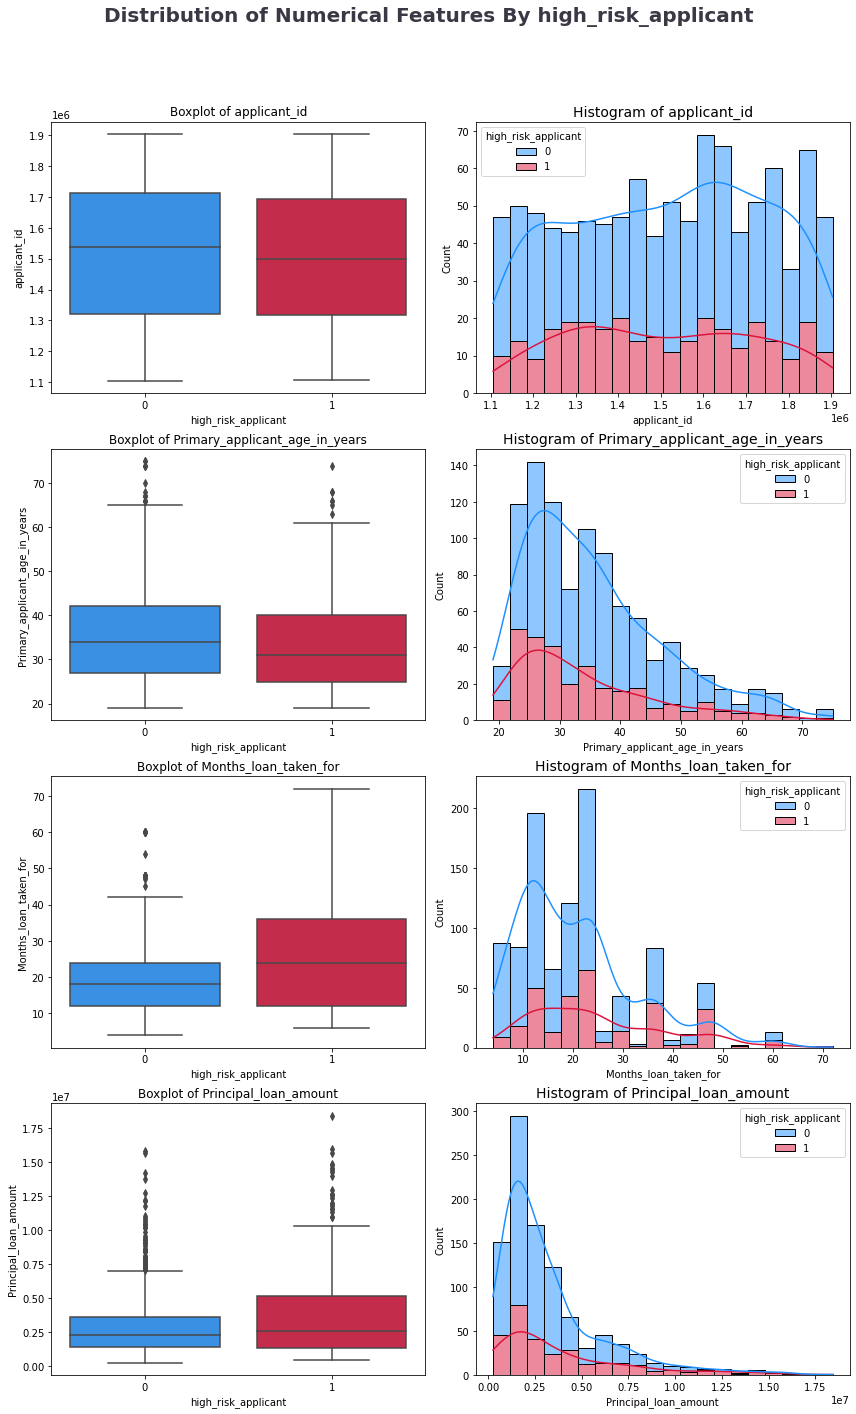

In [22]:
clr1 = ['#1E90FF', '#DC143C']
fig, ax = plt.subplots(4, 2, figsize=(12,20))
fig.suptitle('Distribution of Numerical Features By high_risk_applicant', 
             color='#3C3744', fontsize=20, fontweight='bold', ha='center')
plt.subplots_adjust(hspace=0.2)  # Adjusting space between/among subplots

try:
    for i, col in enumerate(continuous_features):   
        sb.boxplot(data=df, x='high_risk_applicant', y=col,  palette=clr1, ax=ax[i,0])
        ax[i,0].set_title(f'Boxplot of {col}', fontsize=12)
        sb.histplot(data=df, x=col, hue='high_risk_applicant', bins=20, 
                    kde=True, multiple='stack', palette=clr1, ax=ax[i,1])
        ax[i,1].set_title(f'Histogram of {col}', fontsize=14)
except Exception as e:
    print('Error: ', str(e))
    
fig.tight_layout()
fig.subplots_adjust(top=0.90)
# plt.savefig('images/multivariate_num.png')

**Report**
* In the `applicant_id` column has unique value for each row, it can be ignored as a feature.
* Minimum `age` group people have seems to have low credit risk.
* Higher the `Months_loan_taken_for` higher will be the chance of credit risk.
* Higher the `Principal_loan_amount` have some credit risk.

## Initial Analysis Report

* **The `high_risk_applicant` column is the target to predict.**
* **The `applicant_id` & `loan_application_id` column can be dropped because each row has unique values.**
* **There are missing values present in below features -**
  - `Purpose`                                                      12
  - `Has_been_employed_for_at_least`                               62
  - `Property`                                                    154
  - `Savings_account_balance`                                     183
  - `Has_been_employed_for_at_most`                               253
  - `Balance_in_existing_bank_account_(upper_limit_of_bucket)`    457
  - `Telephone`                                                   596
  - `Balance_in_existing_bank_account_(lower_limit_of_bucket)`    668
  - `Other_EMI_plans`                                             814

* **`Telephone` column isn't a useful, also not correlated with `high_risk_applicant` (Target Column), hence this can be dropped.**
* **`Other_EMI_plans` column have more than 80% of missing value, hence this can be dropped.**



## 4. Visualization

### 4.1 Visualize the Target Feature

In [23]:
df1 = df.copy()
df1['high_risk_applicant'] = np.where((df.high_risk_applicant == 1),'high_risk_applicant', 'Not-high_risk_applicant' )

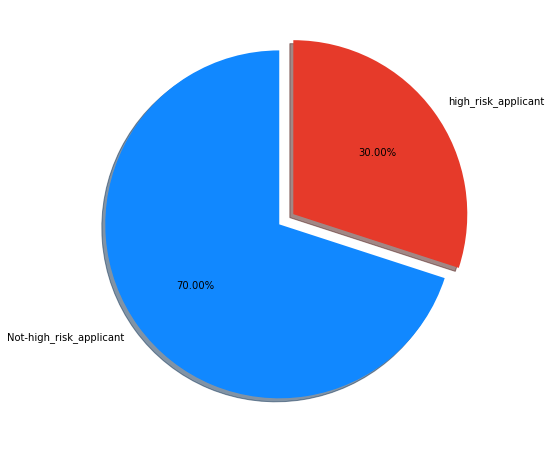

In [24]:
percentage = df1.high_risk_applicant.value_counts(normalize=True)*100
label = ["Not-high_risk_applicant", "high_risk_applicant"]

# Plot PieChart with Ploty library
fig, ax = plt.subplots(figsize =(15, 8))
explode = (0, 0.1)
colors = ['#1188ff', '#e63a2a']
ax.pie(percentage, labels = label, startangle = 90, autopct='%1.2f%%', 
       explode=explode, shadow=True, colors=colors)
plt.show()

* From the chart it is clear that the Target Variable is Imbalanced

**What is imbalanced data?**

Imbalanced data are types of data where the target class has an uneven distribution of observations, i.e Here number of Not-high_risk_applicant has more count than the number of high_risk_applicant of the dataset.

### 4.2 Do Men or Women have more chance of high_risk_applicant?

In [25]:
df1.columns

Index(['applicant_id', 'Primary_applicant_age_in_years', 'Gender',
       'Marital_status', 'Number_of_dependents', 'Housing',
       'Years_at_current_residence', 'Employment_status',
       'Has_been_employed_for_at_least', 'Has_been_employed_for_at_most',
       'Telephone', 'Foreign_worker', 'Savings_account_balance',
       'Balance_in_existing_bank_account_(lower_limit_of_bucket)',
       'Balance_in_existing_bank_account_(upper_limit_of_bucket)',
       'loan_application_id', 'Months_loan_taken_for', 'Purpose',
       'Principal_loan_amount', 'EMI_rate_in_percentage_of_disposable_income',
       'Property', 'Has_coapplicant', 'Has_guarantor', 'Other_EMI_plans',
       'Number_of_existing_loans_at_this_bank', 'Loan_history',
       'high_risk_applicant'],
      dtype='object')

In [26]:
df1[df1.high_risk_applicant == 'high_risk_applicant'].Gender.value_counts(normalize=True)

male      0.636667
female    0.363333
Name: Gender, dtype: float64

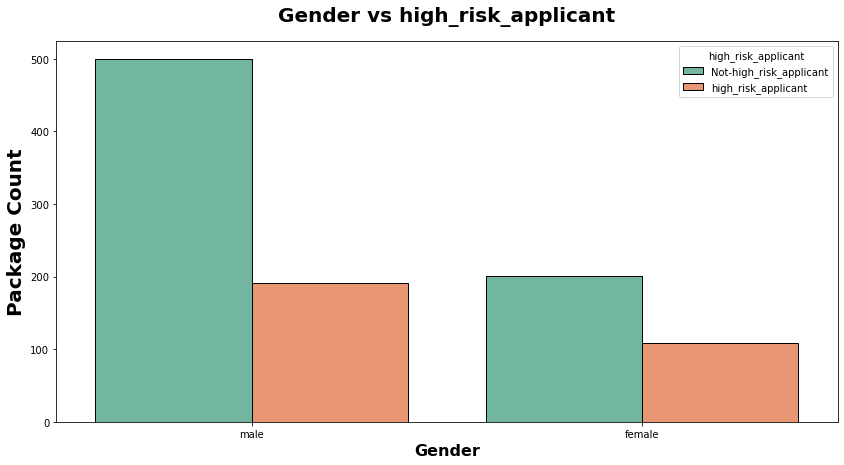

In [27]:
plt.subplots(figsize=(14,7))
sb.countplot(x="Gender", hue="high_risk_applicant", data=df1, ec = "black", palette="Set2")
plt.title("Gender vs high_risk_applicant", weight="bold",fontsize=20, pad=20)
plt.ylabel("Package Count", weight="bold", fontsize=20)
plt.xlabel("Gender", weight="bold", fontsize=16)
plt.show()

**insights**
* As per the chart there is no much difference between the high_risk_applicant of male and female.
* This Feature has no impact on the Target Variable.

* **Our Insights from Chi2 test is that `Gender` column is not correlated with target column. Which is justified by above chart**

### 4.3 Are young people more creditworthy? 

**AGE Category Split**
- There is min age is 19 & max is 75.
- Deviding Age into three category as below -
 - young: 19 to 44.
 - average_age: 45 to 60.
 - senior: 60 to 75.

In [28]:
bins = [19, 44, 60, 75]
labels = ['young', 'average_age', 'senior']
df2 = df.copy()
df2['age_cat'] = pd.cut(df['Primary_applicant_age_in_years'], bins=bins, labels=labels, right=False)
age_group = df2.groupby(['age_cat', 'high_risk_applicant'])['applicant_id'].count().reset_index(name='count')
age_group

,age_cat,high_risk_applicant,count
0,young,0,537
1,young,1,245
2,average_age,0,125
3,average_age,1,42
4,senior,0,36
5,senior,1,13


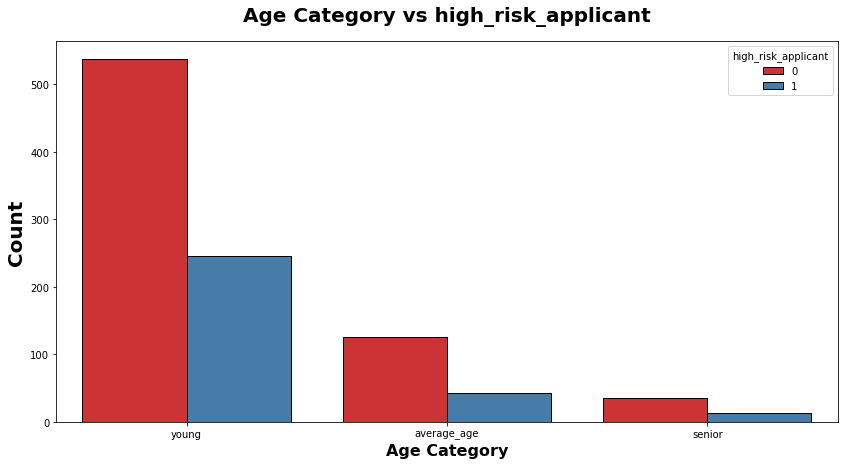

In [29]:
plt.subplots(figsize=(14, 7))
sb.countplot(x="age_cat", hue="high_risk_applicant", data=df2, ec="black", palette="Set1")
plt.title("Age Category vs high_risk_applicant", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=20)
plt.xlabel("Age Category", weight="bold", fontsize=16)
plt.show()

**Report:**
* `young` age applicant have least chance of the high_risk_applicant i.e. young people seems more creditworthy.
* As per the Chart `senior` age Group has the more chance of heart high_risk_applicant followed by `average_age`.

**Percentage of high_risk_applicant applicants with age**

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


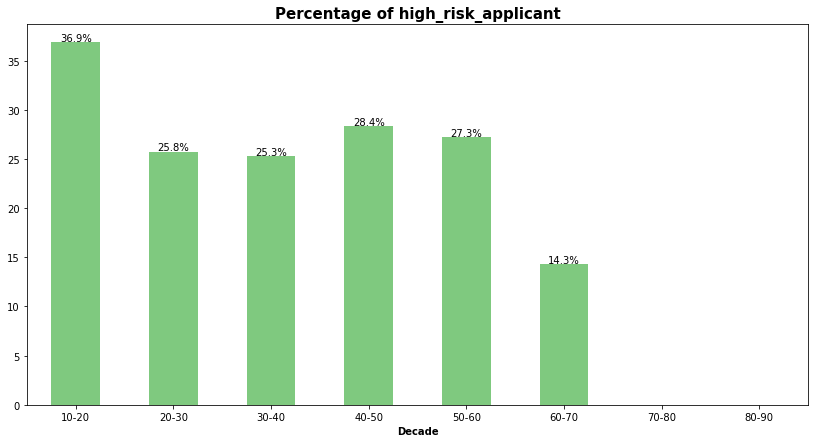

In [30]:
df2 = df.copy()
bins = [19, 29, 39, 49, 59, 69, 79, 89, 99]
labels = ['10-20', '20-30','30-40','40-50','50-60','60-70','70-80','80-90']
df2['age_group'] = pd.cut(df['Primary_applicant_age_in_years'], bins=bins, labels=labels)

import matplotlib.ticker as mtick

plt.figure(figsize=[14,7])

(100*df2[df2["high_risk_applicant"].isin([1])]['age_group'].value_counts()/df2['age_group'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of high_risk_applicant" , fontsize = 15, fontweight ='bold')
order1 = (100*df2[df2["high_risk_applicant"].isin([1])]['age_group'].value_counts()/df2['age_group'].value_counts())

for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n, count+0.1, strt, ha='center')

plt.xlabel('Decade', fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

**Report**
* Surprisingly, it is showing as the age increases there is lower percentage of chance of high_risk_applicant, it doesn't make sense. Not supporting previous statement.

### 4.4 Does marriage have any effect on the high_risk_applicant

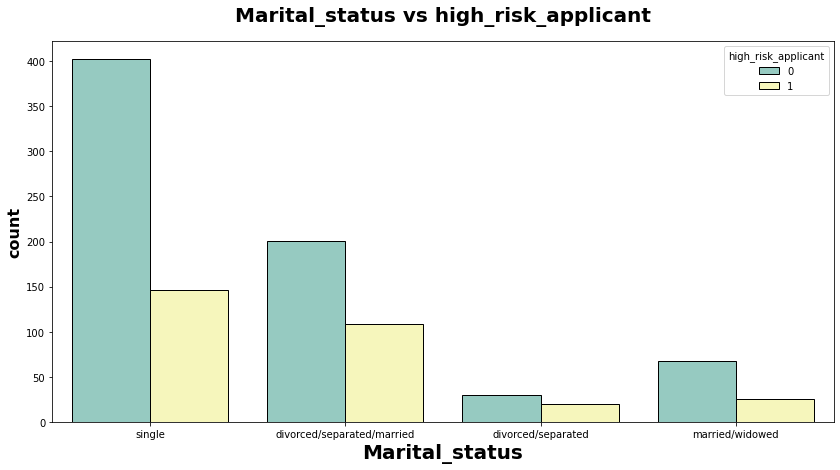

In [31]:
plt.subplots(figsize=(14,7))
sb.countplot(x="Marital_status", hue='high_risk_applicant', data=df, ec="black", palette="Set3")
plt.title("Marital_status vs high_risk_applicant", weight="bold", fontsize=20, pad=20)
plt.xlabel("Marital_status", weight="bold", fontsize=20)
plt.ylabel("count", weight="bold", fontsize=16)
plt.show()

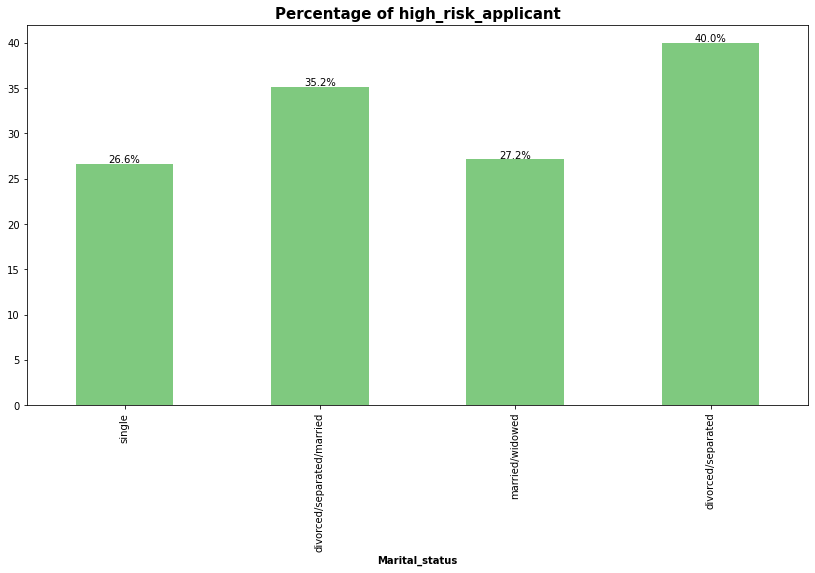

In [32]:
plt.subplots(figsize=(14,7))

(100*df2[df2["high_risk_applicant"].isin([1])]['Marital_status'].value_counts()/df2['Marital_status'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of high_risk_applicant" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["high_risk_applicant"].isin([1])]['Marital_status'].value_counts()/df2['Marital_status'].value_counts())

for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')
    
plt.xlabel('Marital_status' , fontweight ='bold')
plt.show()

**Insights**

* `divorced/separated` applicants have high chance of high_risk_applicant.
* However also it seems that regardless of the Marital_status, applicants have high percentage of credit risk.

### 4.5 Employment_status vs high_risk_applicant

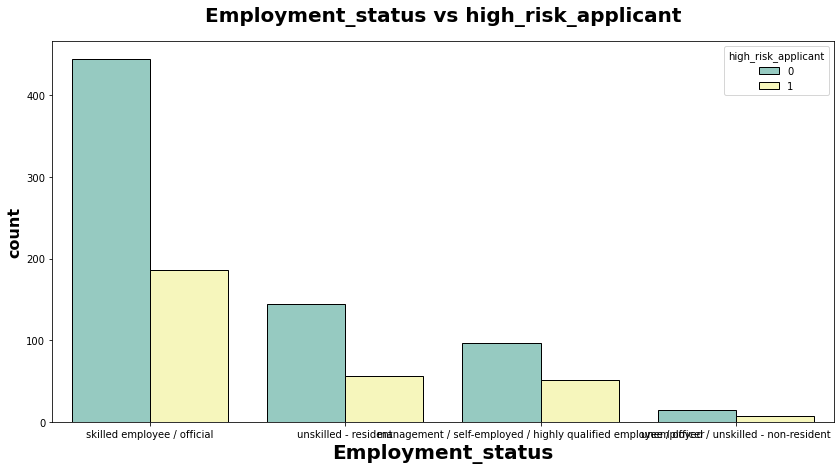

In [33]:
plt.subplots(figsize=(14,7))
sb.countplot(x="Employment_status", hue='high_risk_applicant', data=df, ec="black", palette="Set3")
plt.title("Employment_status vs high_risk_applicant", weight="bold",fontsize=20, pad=20)
plt.xlabel("Employment_status", weight="bold", fontsize=20)
plt.ylabel("count", weight="bold", fontsize=16)
plt.show()

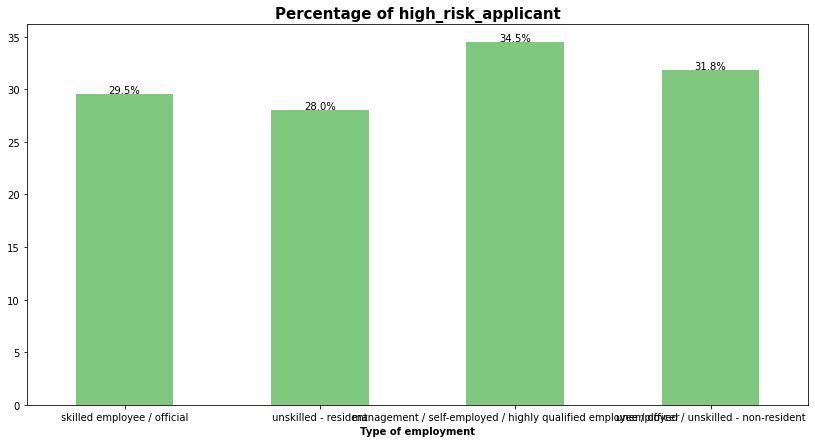

In [34]:
plt.subplots(figsize=(14,7))

(100*df2[df2["high_risk_applicant"].isin([1])]['Employment_status'].value_counts()/df2['Employment_status'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent' )
plt.title("Percentage of high_risk_applicant" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["high_risk_applicant"].isin([1])]['Employment_status'].value_counts()/df2['Employment_status'].value_counts())

for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n, count+0.1, strt, ha='center')
    
plt.xlabel('Type of employment', fontweight='bold')
plt.xticks(rotation=0)
plt.show()

**Insights**

* `management / self-employed / highly qualified employee / officer` applicants have high chance of high_risk_applicant.
* However also it seems that regardless of the Employment_status, applicants have high percentage of credit risk.

### 4.6 Balance_in_existing_bank_account_(lower_limit_of_bucket) vs high_risk_applicant

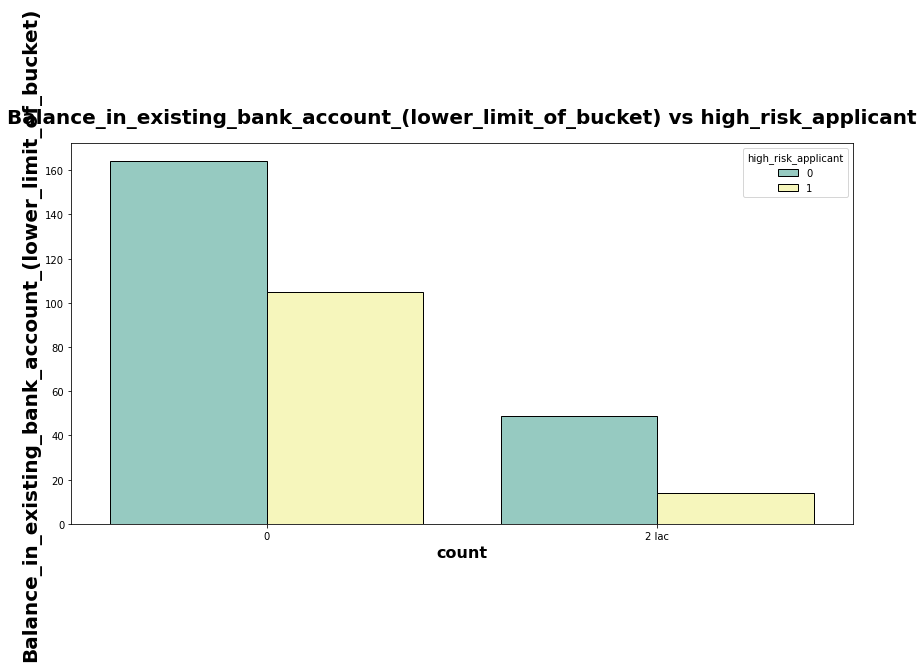

In [35]:
plt.subplots(figsize=(14,7))
sb.countplot(x="Balance_in_existing_bank_account_(lower_limit_of_bucket)", hue='high_risk_applicant', data=df2, ec="black", palette="Set3")
plt.title("Balance_in_existing_bank_account_(lower_limit_of_bucket) vs high_risk_applicant", weight="bold",fontsize=20, pad=20)
plt.ylabel("Balance_in_existing_bank_account_(lower_limit_of_bucket)", weight="bold", fontsize=20)
plt.xlabel("count", weight="bold", fontsize=16)
plt.show()

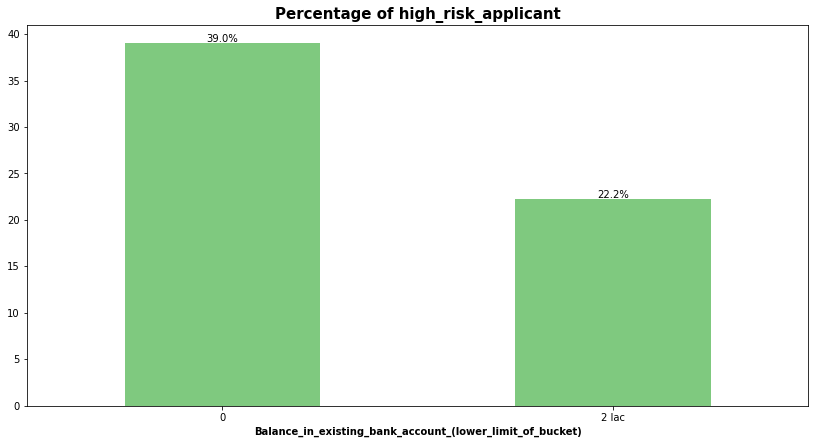

In [36]:
plt.subplots(figsize=(14,7))

(100*df2[df2["high_risk_applicant"].isin([1])]['Balance_in_existing_bank_account_(lower_limit_of_bucket)'].value_counts()/df2['Balance_in_existing_bank_account_(lower_limit_of_bucket)'].value_counts()).plot(kind='bar',stacked=True , colormap='Accent' )
plt.title("Percentage of high_risk_applicant" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["high_risk_applicant"].isin([1])]['Balance_in_existing_bank_account_(lower_limit_of_bucket)'].value_counts()/df2['Balance_in_existing_bank_account_(lower_limit_of_bucket)'].value_counts())

for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')
    
plt.xlabel('Balance_in_existing_bank_account_(lower_limit_of_bucket)', fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

**Insights**

* With lower limit `0` applicants have high chance of high_risk_applicant, however we cannot be reliable on this feature as there is  66.8 % missing values in this feature.

### 4.7 Balance_in_existing_bank_account_(upper_limit_of_bucket) vs high_risk_applicant

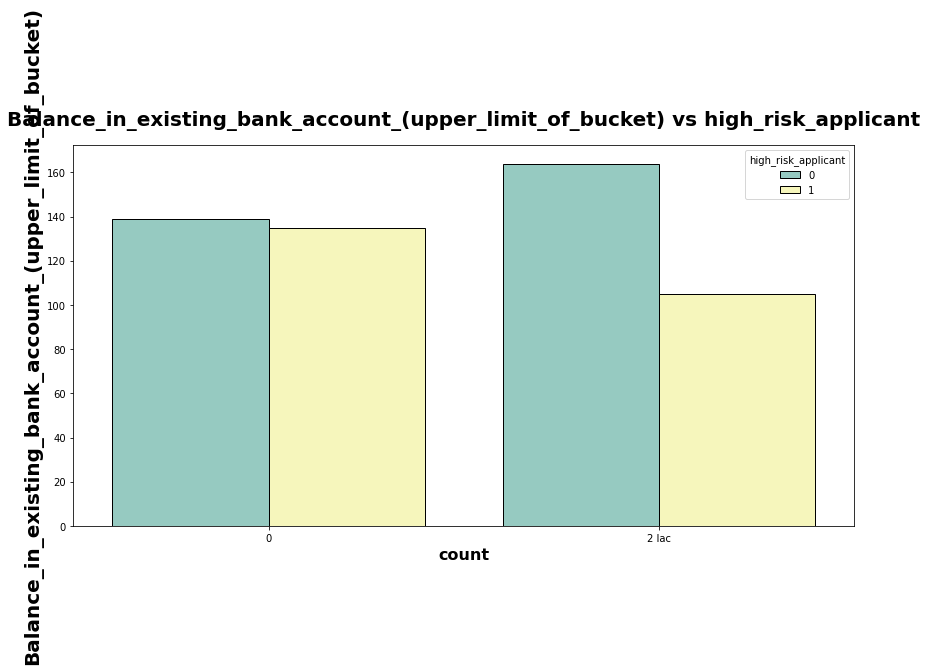

In [37]:
plt.subplots(figsize=(14,7))
sb.countplot(x="Balance_in_existing_bank_account_(upper_limit_of_bucket)", hue='high_risk_applicant', data=df2, ec="black", palette="Set3")
plt.title("Balance_in_existing_bank_account_(upper_limit_of_bucket) vs high_risk_applicant", weight="bold",fontsize=20, pad=20)
plt.ylabel("Balance_in_existing_bank_account_(upper_limit_of_bucket)", weight="bold", fontsize=20)
plt.xlabel("count", weight="bold", fontsize=16)
plt.show()

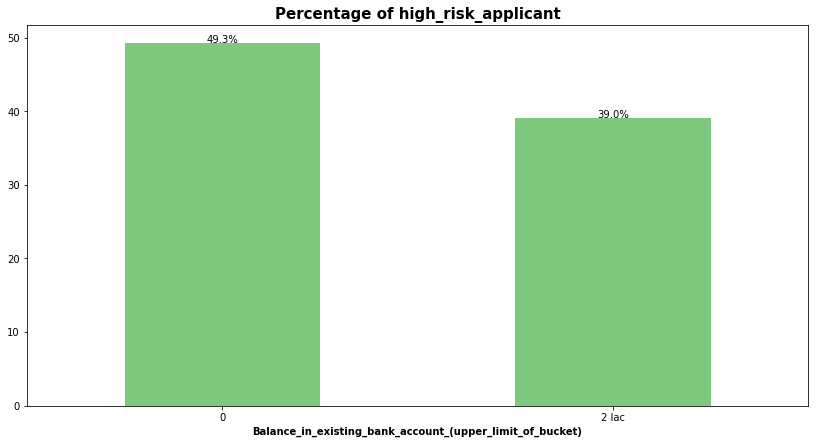

In [38]:
plt.subplots(figsize=(14,7))

(100*df2[df2["high_risk_applicant"].isin([1])]['Balance_in_existing_bank_account_(upper_limit_of_bucket)'].value_counts()/df2['Balance_in_existing_bank_account_(upper_limit_of_bucket)'].value_counts()).plot(kind='bar',stacked=True , colormap='Accent' )
plt.title("Percentage of high_risk_applicant" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["high_risk_applicant"].isin([1])]['Balance_in_existing_bank_account_(upper_limit_of_bucket)'].value_counts()/df2['Balance_in_existing_bank_account_(upper_limit_of_bucket)'].value_counts())

for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')
    
plt.xlabel('Balance_in_existing_bank_account_(upper_limit_of_bucket)', fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

* With upper limit `0` applicants have high chance of high_risk_applicant, however we cannot be reliable on this feature as there is  45.7 % missing values in this feature.

### 4.8 Purpose vs high_risk_applicant

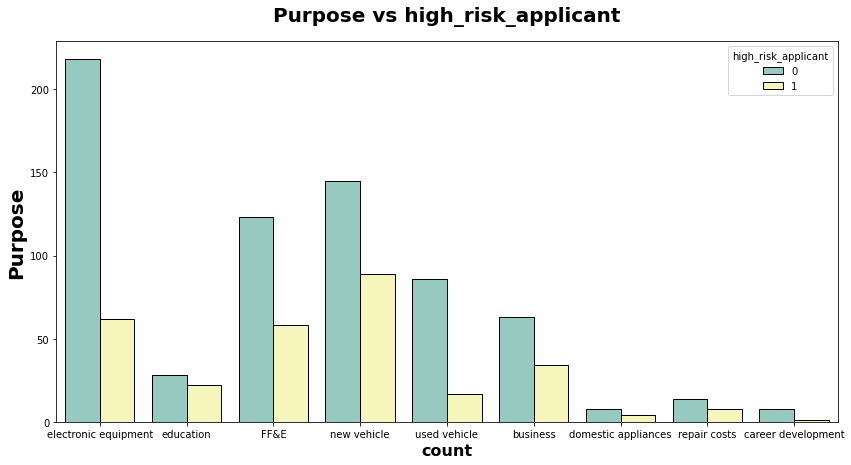

In [39]:
plt.subplots(figsize=(14,7))
sb.countplot(x="Purpose", hue='high_risk_applicant', data=df2, ec="black", palette="Set3")
plt.title("Purpose vs high_risk_applicant", weight="bold",fontsize=20, pad=20)
plt.ylabel("Purpose", weight="bold", fontsize=20)
plt.xlabel("count", weight="bold", fontsize=16)
plt.show()

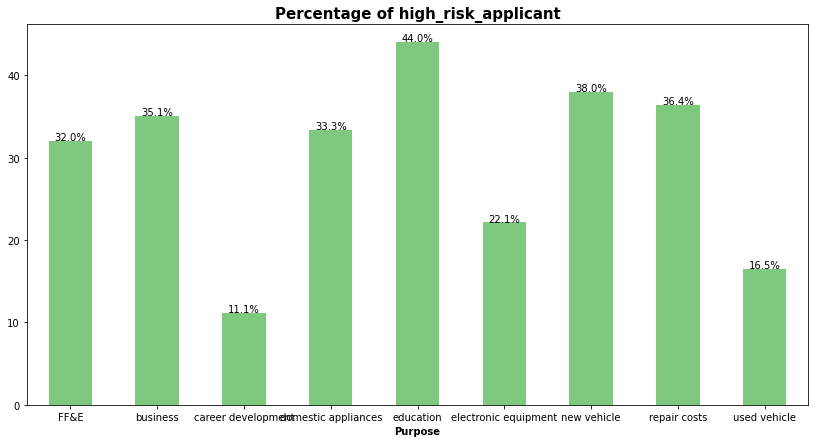

In [40]:
plt.subplots(figsize=(14,7))

(100*df2[df2["high_risk_applicant"].isin([1])]['Purpose'].value_counts()/df2['Purpose'].value_counts()).plot(kind='bar',stacked=True , colormap='Accent' )
plt.title("Percentage of high_risk_applicant" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["high_risk_applicant"].isin([1])]['Purpose'].value_counts()/df2['Purpose'].value_counts())

for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')
    
plt.xlabel('Purpose', fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

**Insights**

* Purpose for `education` applicants have high chance of high_risk_applicant, followed by `new vehicle`.
* `career development` applicants have lowest chance of high_risk_applicant, may be got better oportunities after completing the course.

### 4.9 Loan_history vs high_risk_applicant

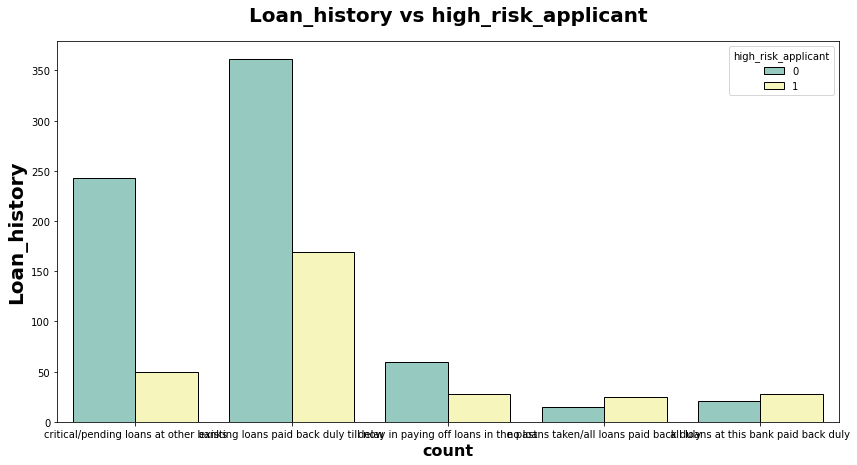

In [41]:
plt.subplots(figsize=(14,7))
sb.countplot(x="Loan_history", hue='high_risk_applicant', data=df2, ec="black", palette="Set3")
plt.title("Loan_history vs high_risk_applicant", weight="bold",fontsize=20, pad=20)
plt.ylabel("Loan_history", weight="bold", fontsize=20)
plt.xlabel("count", weight="bold", fontsize=16)
plt.show()

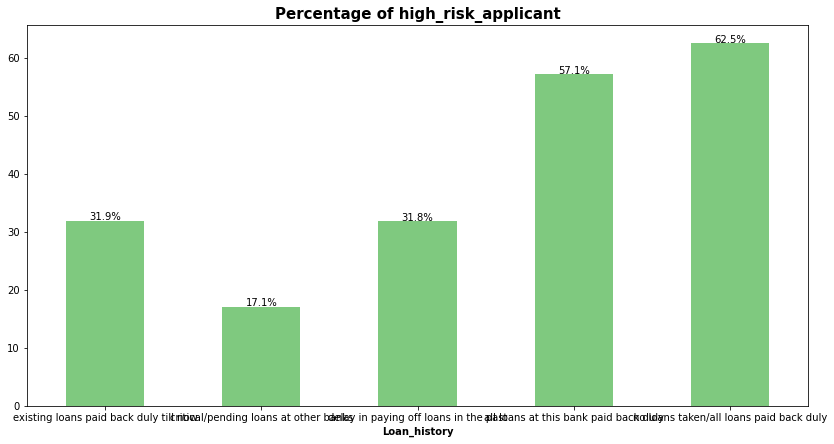

In [42]:
plt.subplots(figsize=(14,7))

(100*df2[df2["high_risk_applicant"].isin([1])]['Loan_history'].value_counts()/df2['Loan_history'].value_counts()).plot(kind='bar',stacked=True , colormap='Accent' )
plt.title("Percentage of high_risk_applicant" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["high_risk_applicant"].isin([1])]['Loan_history'].value_counts()/df2['Loan_history'].value_counts())

for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')
    
plt.xlabel('Loan_history', fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

**Insights**

* Loan_history for `no loans taken/all loans paid back duly` applicants have high chance of high_risk_applicant, however it doesn't make any sense. 

### Checking outliers for continuous features

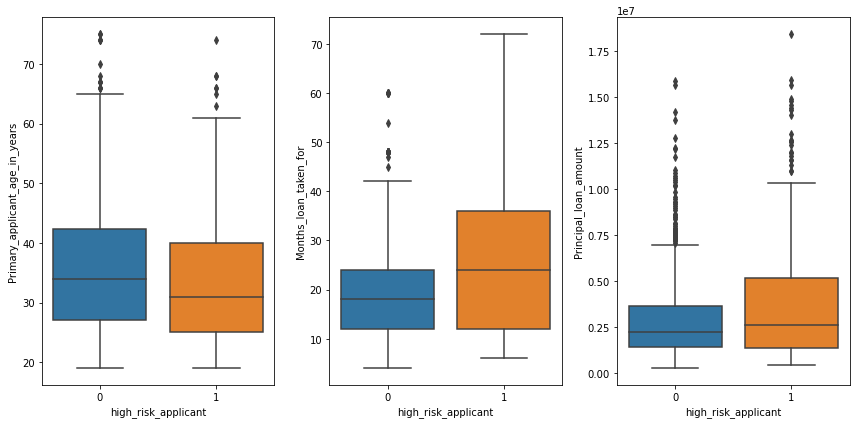

In [43]:
column_list = ['Primary_applicant_age_in_years', 'Months_loan_taken_for', 'Principal_loan_amount']

fig, ax = plt.subplots(1, 3, figsize=(12,6))

for i, col in enumerate(column_list):
    sb.boxplot(data=df, x='high_risk_applicant', y=col, ax=ax[i])

plt.tight_layout()
plt.show()

## Final Report

* The `high_risk_applicant` column is the target to predict.
* The target variable here is imbalanced, Handling imbalanced data is required.
* There are outliers in the `'Primary_applicant_age_in_years`, `Months_loan_taken_for`, `Principal_loan_amount` columns.
* `applicant_id` & `loan_application_id` columns have no importance, we can drop these.
* `Telephone` column isn't a useful, also not correlated with `high_risk_applicant` (Target Column), hence this can be dropped.
* `Other_EMI_plans` column have more than 80% of missing value, hence this can be dropped.
* Null values present, should be handled.

In [44]:
#####################-------------Feature Engineering and Model Training in TASK-2 notebook------------#########################

---
---